# Ekstrakcja cech z obrazu
Opracowanie: A.Florkowska
\
Repozytorium: https://github.com/aflorkowska/Image-Processing/tree/main

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import scipy.ndimage as nd
from skimage import color, io
import matplotlib.pyplot as plt
from skimage import measure, morphology
from IPython.display import Image

ModuleNotFoundError: No module named 'cv2'

# Ekstrakcja cech

Proces ekstrakcji cech odnosi się do identyfikacji, selekcji i wyodrębniania istotnych cech z obrazu, które mogą być używane do analizy, rozpoznawania wzorców, klasyfikacji lub innych zadań przetwarzania obrazów. Jest on kluczowym krokiem, ponieważ pozwala na redukcję wymiarowości danych, eliminując nieistotne informacje i koncentrując się na tych szczególnym dla konkretnego zadania.

Istnieje wiele różnych metod ekstrakcji cech, z których każda może być odpowiednia w zależności od konkretnego problemu i typu danych obrazowych. Mogą być one przeprowadzone zarówno w dziedzinie przetrzennej (piksele), jak i dziedzinie częstotliwości.  

Zazwyczaj techniki te są podzielone ze względu na rodzaj cech, który ekstrahują, tzn. dotyczące:
- koloru obrazu
- tekstury obrazu
- geometrii i kształtów na obrazie
- cech statystycznych obrazu

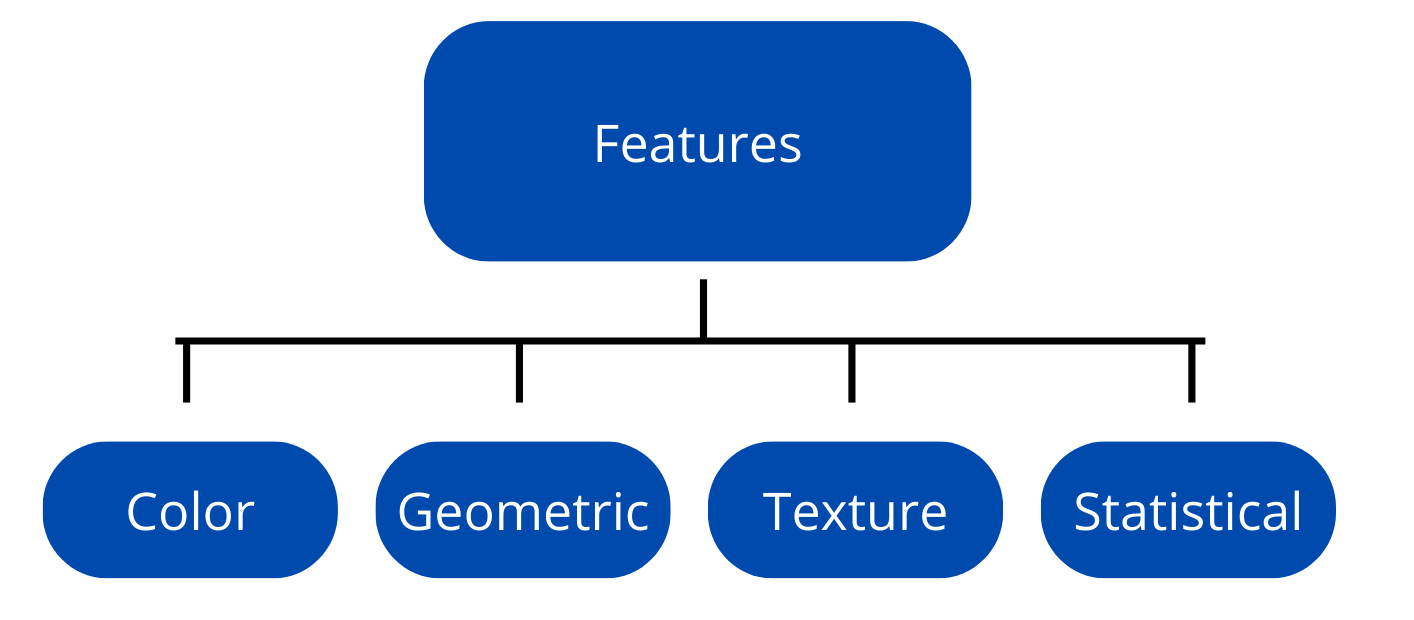

In [5]:
Image(filename=".././images/10_1.png", width=500)

Analiza obrazu może być przeprowadzana zarówno manualnie, przez człowieka (analiza ręczna), jak i automatycznie, za pomocą algorytmów i technik przetwarzania obrazów (analiza automatyczna). 

W przypadku analizy automatycznej wydzielić można dwa główne spotykane nurty: 
- analiza przy użyciu metod uczenia maszynowego (ML)
- analiza przy użyciu sieci głębokich (DL)

normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) W obu przypadkach proces ten składa się z etapu ekstrakcji cech. Przy zastosowaniu metod uczenia maszynowego na danych obrazowych należy najpierw wyekstrahować cechy przy użyciu któreś z metod opisanej w tych notatniku, a następnie zastosować je jako dane wejściowego dla wybranego algorytmu ML. Natomiast w przypadku sieci głębokich, ten etap jest realizowany przez konkretne warstwy np. konwolucyjne. 

Image shape: (1500, 2000, 3)


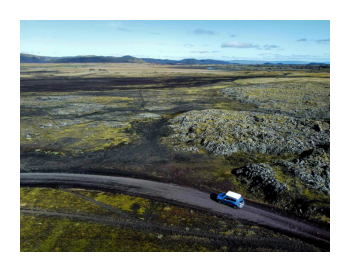

In [15]:
image = io.imread(".././images/example3.jpeg")
print(f"Image shape: {image.shape}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Przestrzeń kolorów
Ekstrakcja cech koloru koncentruje się na analizie informacji dotyczącej różnorodności i rozkładu kolorów w obrazie. Podstawowym narzędziem w ekstrakcji cech koloru są histogramy, które pokazują częstość występowania poszczególnych kolorów w obrazie. Techniki ekstrakcji cech koloru często wykorzystują przekształcenia przestrzeni barwnej, aby lepiej odzwierciedlić percepcję kolorów przez człowieka.

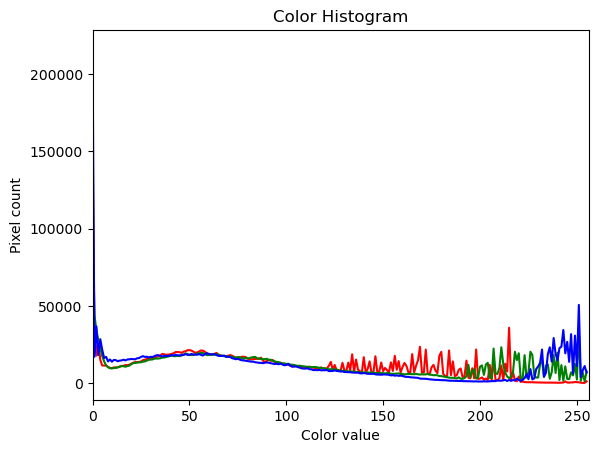

In [20]:
colors = ("red", "green", "blue")

fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax.plot(bin_edges[0:-1], histogram, color=color)

ax.set_title("Color Histogram")
ax.set_xlabel("Color value")
ax.set_ylabel("Pixel count")
plt.show()

Najczęściej używanymi przestrzeniami barw są:
- RGB (Red, Green, Blue) - to najbardziej powszechna przestrzeń barwna w systemach komputerowych. Każdy kolor jest opisywany jako kombinacja składowych czerwonej, zielonej i niebieskiej. Dla każdej składowej koloru wartość mieści się w zakresie od 0 do 255 (lub od 0 do 1 w przypadku normalizowanego RGB).
- CMYK (Cyan, Magenta, Yellow, Black) - to przestrzeń barwna używana głównie w druku. Składa się z czterech składowych: cyjanu, magenty, żółtego i czerni. Kolor jest tworzony przez mieszanie tych czterech barw.
- HSV (Hue, Saturation, Value) - to przestrzeń barwna, która opisuje kolor za pomocą trzech parametrów: odcień, nasycenie i wartość. Odcień określa rodzaj koloru (na przykład czerwony, niebieski, zielony), nasycenie określa "czystość" koloru, a wartość określa jasność koloru.
- LAB - to przestrzeń barwna oparta na percepcji ludzkiego wzroku. Składa się z trzech komponentów: jasności (L), barwy czerwono-zielonej (A) i barwy żółto-niebieskiej (B).
- YCrCb (luminance, chrominance Red, chrominance Blue) - to przestrzeń barwna wykorzystywana ze względu na właściwości, które ułatwiają przetwarzanie i kompresję obrazów. Główną zaletą jest możliwość separacji jasności od informacji o kolorze, co ułatwia kompresję danych, a także umożliwia przetwarzanie sygnałów wideo w sposób niezależny od kanałów kolorów.

Znaczenie tych przestrzeni kolorów może być czasami niedoceniane. Czasami warto przekonwertować obraz do innej przestrzeni barwnej, aby uzyskać wyraźniejsze interesujące cechy. Co więcej, czasami różnica bądź suma obrazów z różnych przestrzenii barw dopiero pozwala na uzyskanie satysfakcjonujących wyników.

In [21]:
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

NameError: name 'cv2' is not defined

# Geometria
Ekstrakcja cech geometrii koncentruje się na analizie kształtu, rozmiaru, proporcji i innych cech geometrycznych obiektów na obrazie. Podstawowym krokiem w ekstrakcji cech geometrii jest wykrywanie krawędzi obiektów, co umożliwia identyfikację granic i konturów. Często w procesie ekstrakcji cech geometrii stosuje się segmentację obrazu, czyli podział obrazu na obszary zawierające jednorodne cechy geometryczne.

# Tekstura
Ekstrakcja cech tekstury koncentruje się na analizie powtarzających się wzorców teksturalnych na obrazie. Wykorzystuje się techniki filtrowania, takie jak filtry Gabora, do wyodrębnienia informacji o teksturze z obrazu. Metody takie jak LBP i HOG pozwalają na opisanie lokalnych wzorców tekstury poprzez analizę orientacji gradientu lub binarnych wzorców.

# Cechy statystyczne
Ekstrakcja cech statystycznych polega na analizie rozkładu pikseli w obrazie oraz różnych parametrów statystycznych tych rozkładów. Do cech statystycznych zaliczają się średnia, wariancja, skośność, kurtoza oraz różne kwantyle rozkładu pikseli w obrazie. Często wykorzystuje się histogramy intensywności oraz macierze współwystępowania pikseli (ang. co-occurrence matrices) do analizy statystycznej obrazu. Cechy statystyczne mogą być przydatne w zadaniach klasyfikacji, segmentacji czy detekcji obiektów, ponieważ pozwalają na opisanie różnic między obrazami lub obszarami obrazu na podstawie ich charakterystyk statystycznych. W praktyce, często są wykorzystywane w połączeniu z innymi rodzajami cech, takimi jak cechy koloru, geometrii czy tekstury, aby uzyskać kompleksowy opis obrazu. 

# Źródła
- Opis algorytmów: https://raychunyin00.medium.com/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73